# Explore here

Predicting Diabetes

In [148]:
# Your code here
import pandas as pd


Step 1: Loading the dataset

In [149]:
#Dataset
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [150]:
#data type
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [151]:
# Check for missing values in each column
print("Total missing values for each column:")
print(total_data.isnull().sum(axis=0))

Total missing values for each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [152]:
missing_proportion = round(total_data.isnull().sum(axis=0) / len(total_data), 4)

print("Proportion of missing values for each column:")
print(missing_proportion)

Proportion of missing values for each column:
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [153]:
#Eliminate duplicate
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (768, 9)
Dimensions after dropping duplicates: (768, 9)


In [154]:

# Display summary statistics
print(total_data.describe())



       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [155]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Step 2 Perform a full EDA

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into the independent (X) and dependent (y) variables
X = total_data.drop('Outcome', axis=1)
y = total_data['Outcome']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
#Training and testing data
# X represents all features excluding the target
X = total_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] # A dataframe (double brackets)

# y contains our target feature
y = total_data['Outcome'] # A series (single brackets)

In [158]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [159]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [160]:
#Training the data
	
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [161]:
nrows, ncolumns = total_data.shape

print(f"Our entire dataset has {nrows} rows.")
print(f"Our training set should have 80% of our data so it should have {int(0.8*nrows)} rows.")
print(f"Our test set should have 20% of our data so it should have {int(0.2*nrows)} rows.")

Our entire dataset has 768 rows.
Our training set should have 80% of our data so it should have 614 rows.
Our test set should have 20% of our data so it should have 153 rows.


In [162]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
86,13,106,72,54,0,36.6,0.178,45
620,2,112,86,42,160,38.4,0.246,28
178,5,143,78,0,0,45.0,0.190,47
715,7,187,50,33,392,33.9,0.826,34
678,3,121,52,0,0,36.0,0.127,25
...,...,...,...,...,...,...,...,...
208,1,96,64,27,87,33.2,0.289,21
571,2,130,96,0,0,22.6,0.268,21
690,8,107,80,0,0,24.6,0.856,34
576,6,108,44,20,130,24.0,0.813,35


In [163]:
y_train

86     0
620    0
178    0
715    1
678    1
      ..
208    0
571    0
690    0
576    0
230    1
Name: Outcome, Length: 614, dtype: int64

In [164]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
191,9,123,70,44,94,33.1,0.374,40
477,7,114,76,17,110,23.8,0.466,31
143,10,108,66,0,0,32.4,0.272,42
96,2,92,62,28,0,31.6,0.130,24
163,2,100,64,23,0,29.7,0.368,21
...,...,...,...,...,...,...,...,...
279,2,108,62,10,278,25.3,0.881,22
119,4,99,76,15,51,23.2,0.223,21
420,1,119,88,41,170,45.3,0.507,26
245,9,184,85,15,0,30.0,1.213,49


In [165]:
y_test

191    0
477    0
143    1
96     0
163    0
      ..
279    0
119    0
420    0
245    1
9      1
Name: Outcome, Length: 154, dtype: int64

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have your data ready in X_train_scaled, y_train
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Now, try saving the model again
os.makedirs(os.path.dirname(model_path), exist_ok=True)
dump(grid_search.best_estimator_, model_path)
print(f"Model saved to {model_path}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_spli

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
256 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [167]:
from joblib import dump
import os

# Path where you want to save the model
model_path = "./models/best_decision_tree_model.joblib"

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Assuming 'grid_search' has been defined and fitted as shown previously
dump(grid_search.best_estimator_, model_path)

print(f"Model saved to {model_path}")

Model saved to ./models/best_decision_tree_model.joblib


In [168]:
from joblib import dump
import os

# Path where you want to save the model
model_path = "./models/best_decision_tree_model.joblib"

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Assuming 'grid_search' has been defined and fitted as shown previously
dump(grid_search.best_estimator_, model_path)

print(f"Model saved to {model_path}")


Model saved to ./models/best_decision_tree_model.joblib


In [169]:
# Print the column names to verify
print(X_train.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [170]:
def replace_outliers(x_train, x_test):
    columns = x_train.columns

    # This loop will replace outliers for each column
    for column in columns:
        # Calculate Q_25 and Q_75 for the column using the data from the x_train set
        Q_25 = x_train[column].quantile(0.25)
        Q_75 = x_train[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q_75 - Q_25

        # Calculate the upper and lower limit
        upper_limit = Q_75 + 1.5*IQR
        lower_limit = Q_25 - 1.5*IQR

        # Replace the outliers that are below the lower limit with the Q_25 value for both the training and test sets
        x_train.loc[x_train[column] < lower_limit, column] = Q_25
        x_test.loc[x_test[column] < lower_limit, column] = Q_25

        # Replace the outliers that are above the upper limit with the Q_75 value for both the training and test sets
        x_train.loc[x_train[column] > upper_limit, column] = Q_75
        x_test.loc[x_test[column] > upper_limit, column] = Q_75
    
    return x_train, x_test

In [171]:
X_train, X_test = replace_outliers(X_train, X_test)


/tmp/ipykernel_37546/2555475927.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[x_train[column] > upper_limit, column] = Q_75
/tmp/ipykernel_37546/2555475927.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test.loc[x_test[column] > upper_limit, column] = Q_75


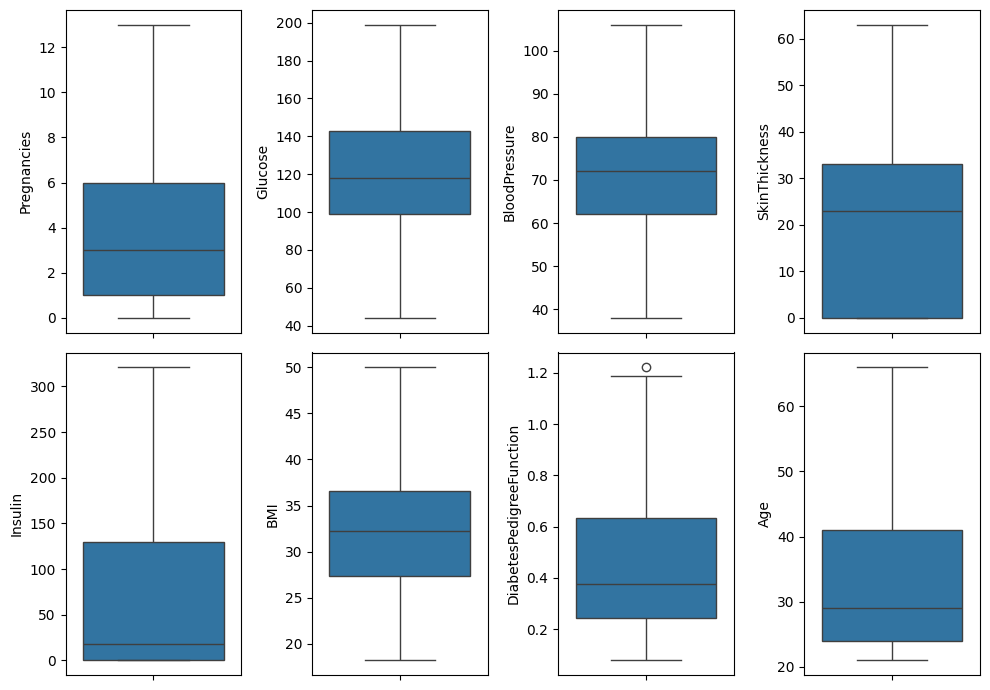

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 4, figsize=(10, 7))

sns.boxplot(ax=axis[0, 0], data=X_train, y="Pregnancies")
sns.boxplot(ax=axis[0, 1], data=X_train, y="Glucose")
sns.boxplot(ax=axis[0, 2], data=X_train, y="BloodPressure")
sns.boxplot(ax=axis[0, 3], data=X_train, y="SkinThickness")
sns.boxplot(ax=axis[1, 0], data=X_train, y="Insulin")
sns.boxplot(ax=axis[1, 1], data=X_train, y="BMI")
sns.boxplot(ax=axis[1, 2], data=X_train, y="DiabetesPedigreeFunction")  
sns.boxplot(ax=axis[1, 3], data=X_train, y="Age")

plt.tight_layout()

Missing Value Analysis

In [173]:
print("Total missing values for each column in our X_train:")
print(X_train.isnull().sum(axis=0))

Total missing values for each column in our X_train:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [174]:
print("Total missing values for each column in our X_test:")
print(X_test.isnull().sum(axis=0))

Total missing values for each column in our X_test:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [175]:
def replace_missing_vaues(x_train, x_test):
    columns = x_train.columns

    # This loop will replace missing vaues for each column
    for column in columns:
        # Find the mean using the training data points
        mean_value = x_train[column].mean()

        # Replace missing values with the mean for the column in both the training and test sets
        x_train[column] = x_train[column].fillna(mean_value)
        x_test[column] = x_test[column].fillna(mean_value)

    return x_train, x_test

In [176]:
X_train, X_test = replace_missing_vaues(X_train, X_test)


Feature Scaling

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

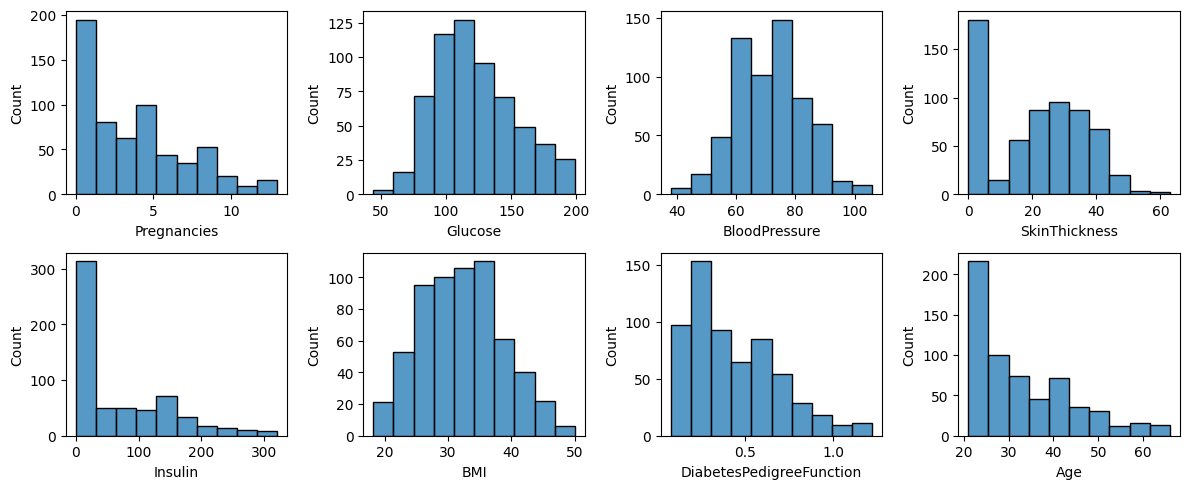

In [178]:
fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_train, x = "Pregnancies", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_train, x = "Glucose", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_train, x = "BloodPressure", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_train, x = "SkinThickness", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_train, x = "Insulin", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_train, x = "BMI", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_train, x = "DiabetesPedigreeFunction", bins = 10)
sns.histplot(ax = axis[1, 3], data = X_train, x = "Age", bins = 10)

plt.tight_layout()

plt.show()


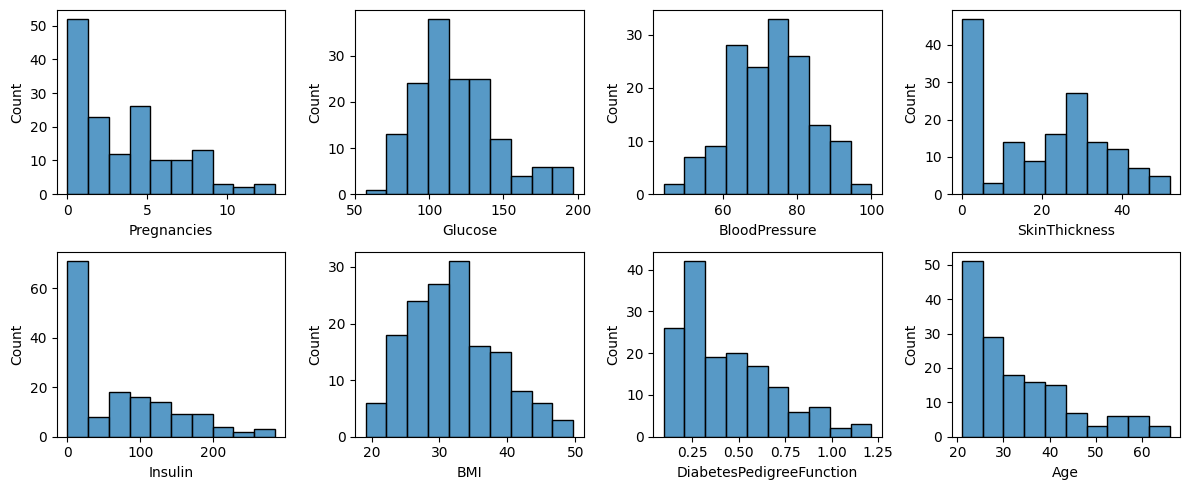

In [179]:
fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_test, x = "Pregnancies", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_test, x = "Glucose", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_test, x = "BloodPressure", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_test, x = "SkinThickness", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_test, x = "Insulin", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_test, x = "BMI", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_test, x = "DiabetesPedigreeFunction", bins = 10)
sns.histplot(ax = axis[1, 3], data = X_test, x = "Age", bins = 10)

plt.tight_layout()

plt.show()


In [180]:
scaler.fit(X_train)


StandardScaler()

In [181]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [182]:
X_train_scaled

array([[ 2.79013605, -0.52771777,  0.03955256, ...,  0.68141357,
        -1.04527796,  1.09304201],
       [-0.55525342, -0.33342312,  1.24949495, ...,  0.96195979,
        -0.77388744, -0.44624192],
       [ 0.35712553,  0.67043257,  0.5580993 , ...,  1.99062927,
        -0.99738552,  1.27413424],
       ...,
       [ 1.26950447, -0.49533533,  0.73094821, ..., -1.18889457,
         1.66064518,  0.09703476],
       [ 0.66125184, -0.46295289, -2.38033222, ..., -1.28240998,
         1.48903058,  0.18758087],
       [ 0.05299921,  0.63805013,  1.24949495, ...,  1.83477025,
         0.81853635, -0.9895186 ]])

#plotting histograms of the scaled feaures 

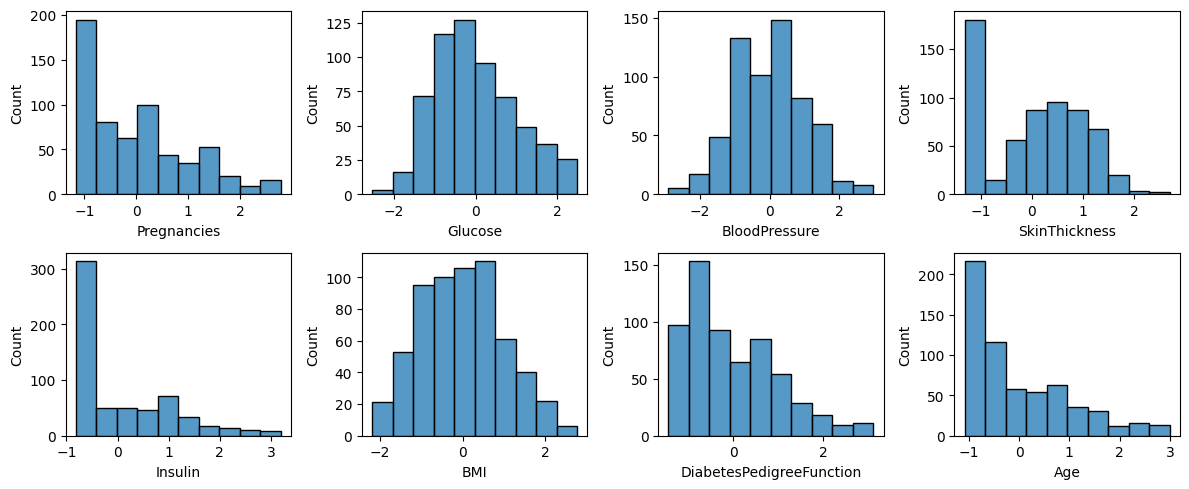

In [183]:
# Convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, axis = plt.subplots(2, 4, figsize=(12, 5))

sns.histplot(ax=axis[0, 0], data=X_train_scaled_df, x="Pregnancies", bins=10)
sns.histplot(ax=axis[0, 1], data=X_train_scaled_df, x="Glucose", bins=10)
sns.histplot(ax=axis[0, 2], data=X_train_scaled_df, x="BloodPressure", bins=10)
sns.histplot(ax=axis[0, 3], data=X_train_scaled_df, x="SkinThickness", bins=10)
sns.histplot(ax=axis[1, 0], data=X_train_scaled_df, x="Insulin", bins=10)
sns.histplot(ax=axis[1, 1], data=X_train_scaled_df, x="BMI", bins=10)
sns.histplot(ax=axis[1, 2], data=X_train_scaled_df, x="DiabetesPedigreeFunction", bins=10)
sns.histplot(ax=axis[1, 3], data=X_train_scaled_df, x="Age", bins=10)

plt.tight_layout()
plt.show()

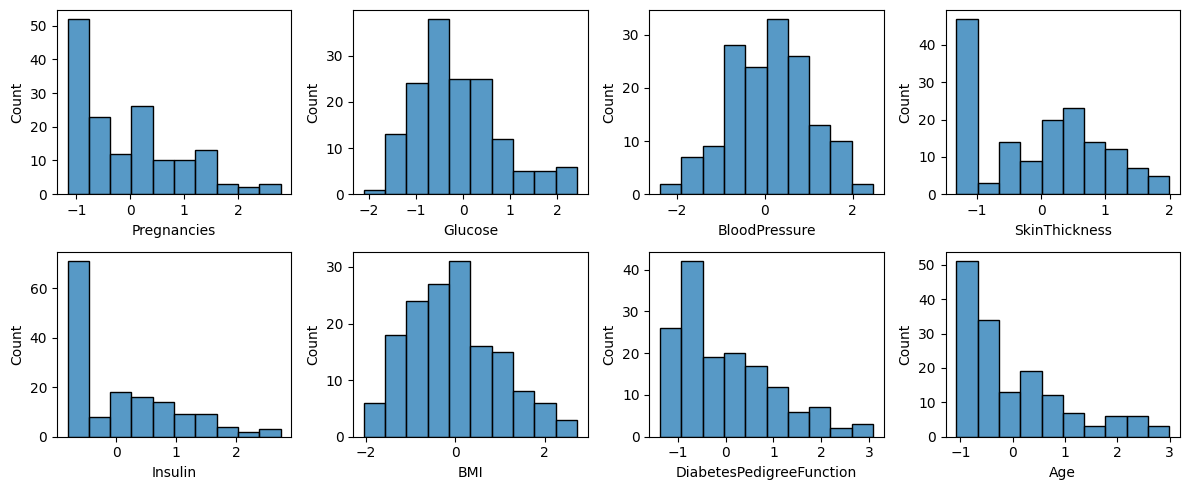

In [184]:

#observation from the X_test
# Convert scaled data back to DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

fig, axis = plt.subplots(2, 4, figsize=(12, 5))

sns.histplot(ax=axis[0, 0], data=X_test_scaled_df, x="Pregnancies", bins=10)
sns.histplot(ax=axis[0, 1], data=X_test_scaled_df, x="Glucose", bins=10)
sns.histplot(ax=axis[0, 2], data=X_test_scaled_df, x="BloodPressure", bins=10)
sns.histplot(ax=axis[0, 3], data=X_test_scaled_df, x="SkinThickness", bins=10)
sns.histplot(ax=axis[1, 0], data=X_test_scaled_df, x="Insulin", bins=10)
sns.histplot(ax=axis[1, 1], data=X_test_scaled_df, x="BMI", bins=10)
sns.histplot(ax=axis[1, 2], data=X_test_scaled_df, x="DiabetesPedigreeFunction", bins=10)
sns.histplot(ax=axis[1, 3], data=X_test_scaled_df, x="Age", bins=10)

plt.tight_layout()
plt.show()

#3 Build Regression model

Results for Decision Tree with Gini:
Accuracy: 0.6558441558441559
Confusion Matrix:
[[85 25]
 [28 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       110
           1       0.39      0.36      0.38        44

    accuracy                           0.66       154
   macro avg       0.57      0.57      0.57       154
weighted avg       0.65      0.66      0.65       154

---------------------------------------------------
Results for Decision Tree with Entropy:
Accuracy: 0.6883116883116883
Confusion Matrix:
[[86 24]
 [24 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       110
           1       0.45      0.45      0.45        44

    accuracy                           0.69       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.69      0.69      0.69       154

---------------------------------------

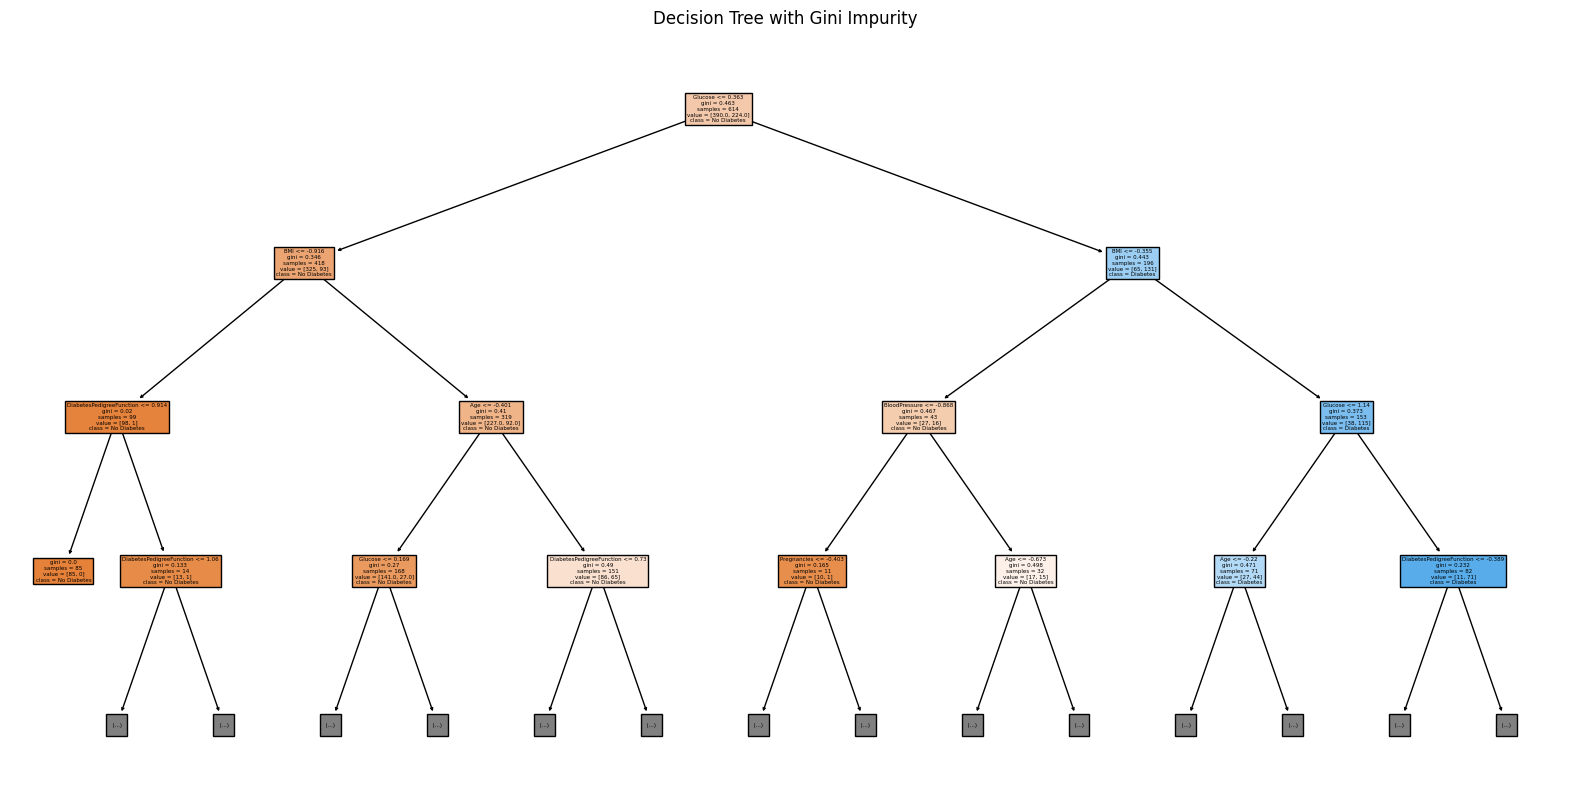

In [185]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Model using Gini Impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_scaled, y_train)
y_pred_gini = dt_gini.predict(X_test_scaled)

# Model using Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_scaled, y_train)
y_pred_entropy = dt_entropy.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------------")

evaluate_model(y_test, y_pred_gini, 'Decision Tree with Gini')
evaluate_model(y_test, y_pred_entropy, 'Decision Tree with Entropy')

# Visualizing one of the trees
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], max_depth=3)
plt.title('Decision Tree with Gini Impurity')
plt.show()


Step 4: Optimize the previous model

In [186]:
from sklearn.model_selection import GridSearchCV

# Assuming 'gini' was the better performing criterion
dt = DecisionTreeClassifier(criterion='gini', random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred_optimized = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate the optimized model
evaluate_model(y_test, y_pred_optimized, 'Optimized Decision Tree')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
270 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
201 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

Step 5: Save the model

In [187]:
import os
from joblib import dump

# Assuming 'best_model' is your optimized Decision Tree model from GridSearchCV
best_model = grid_search.best_estimator_

# Define the path where you want to save the model
model_path = "./models/best_decision_tree_model.joblib"

# Check if the directory exists, and if not, create it
model_directory = os.path.dirname(model_path)
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the model
dump(best_model, model_path)

print(f"Model saved to {model_path}")



Model saved to ./models/best_decision_tree_model.joblib
